# Introduction
This notebook implements Logistic Regression with Gradient Descent. 

- Algorithms: Logistic Regression
- DataSets:   "logistic_regression" 
- Video: To Be Added.


# Logistic Regression
The hypothesis set for logistic regression is

$$ H = \{ \sigma(w^T x) \mid w\in R^{d+1}\} $$

Given data $D=\{(x_1,y_1),...,(x_N, y_N)\}$ we want to minimize the following error function

$$E_{in}(h)=\sum_{i=1}^N...$$

Notice that any hypothesis $h(x)=\sigma(w^Tx)\in H$ is described exactly by is weights $w\in R^{d+1}$. Our goal is to find weights $w$ such that we minimize the in-sample error $E_{in}(w)$. 

Unfortunately, for Logistic Regression we do not have a formula that computes the optimal weights. The gradient can be found [1] to be 

$$\nabla_w E_{in}(w)=..$$

In the code below we use this as a fact. 

<IPython.core.display.Javascript object>


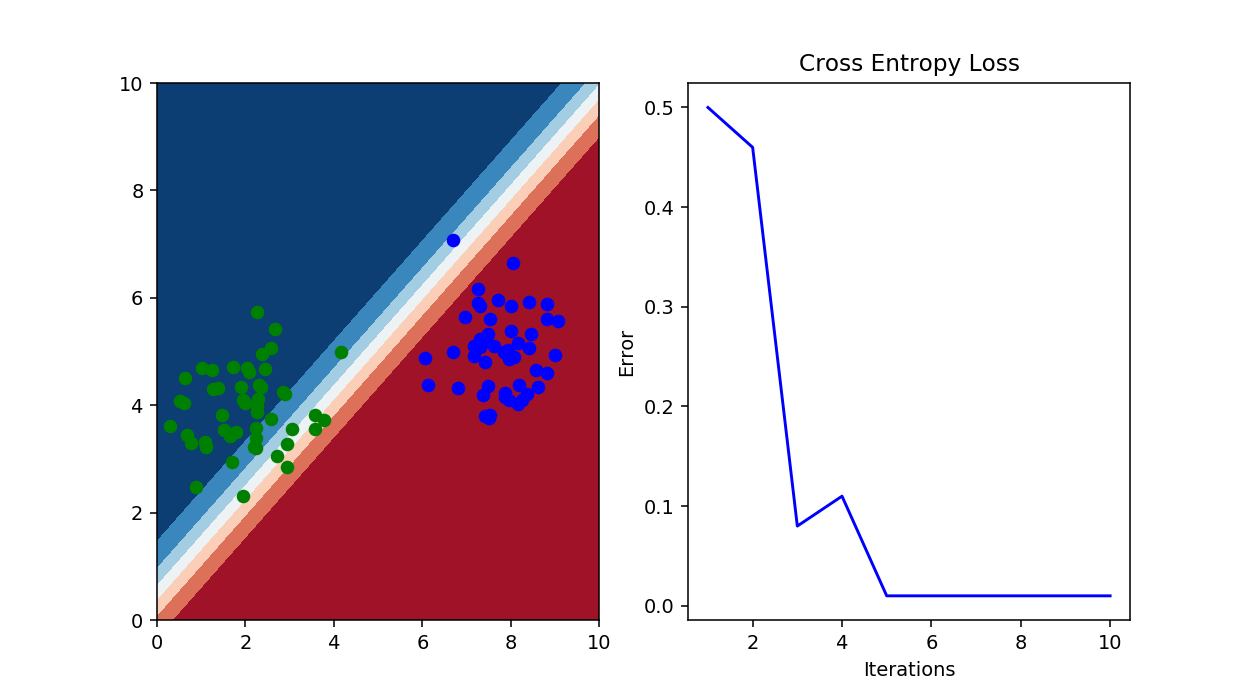

49
51


In [87]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

class TargetFunction():
    def __init__(self, function, string_representation): 
        self.function = function
        self.string_representation = string_representation
        
    def __str__(self):
        return self.string_representation
    

class DataSet:
    
    # Potential features:
    # - Add parameter that allows to decide if bias should be encoded in data.
    # - Add parameter that allows to decide if labels should be {0, 1} or {-1, +1}
    def __init__(self, name, n=100):
        self.name = name
        if name == "perceptron": 
            self.X, self.y = self.make_classification(n, 2, means = np.array([[2,4], [8,5]]))
        elif name == "pocket":
            self.X, self.y = self.make_classification(n, 2, means = np.array([[3,5], [8,5]]))
        elif name == "linear_regression":
            self.X, self.y, self.target_function = self.make_regression(n, 2)
        elif name == "linear_classification":
            pass
        
    def make_regression(self, n, d):
        """ For now assumes d=2, make data normally distributed around line. """
        
        # Generate normally distributed noise that displaces points from line. 
        noise_variance = 0.5
        normal_distributed_noise = np.random.normal(loc=0, scale=noise_variance, size=n)
        
        # Generate random line f(x)=ax+b such that points normally distributed around line will 
        # have high probability of being inside plot. 
        b = np.random.rand(1)*5+2 # Let 'b' be in [4, 6] uniform random
        sign = np.random.choice([-1, +1])
        a = sign* np.random.rand(1)/10*4 # let 'a' be in [-4/10+noise_var, 4/10-noise_var] so all data are in uniform 10,10 box
        
        target_function = TargetFunction(lambda x: a*x+b, str(round(a[0], 2)) + "*x+" + str(round(b[0], 2)))
        target_function.w = [b, a]
        
        xs = np.ones((n, 2)) 
        xs[:, 1] = np.random.rand(n)*10 
        
        ys = target_function.function(xs[:, 1]) + normal_distributed_noise
        
        return xs, ys, target_function
        
        

    def make_classification(self, n, d, means=None, num_classes=2, linear_seperable=False):
        """ Creates data for a 'num_classes' classification problem. All points are generated in a 
        cube [0, 2]^d. Each class is generated as a normal distribution N(µ, 1) around a 
        randomly generated mean. 

        """
        # Generate num_classes means
        if means is None: 
            means = np.random.rand(num_classes, d)*10
        
        # Initialize data matrix and labels array
        # Encode 1's in first dimension
        X = np.ones((n, d+1))
        y = np.zeros(n, dtype=np.int32)

        for i in range(n):
            y[i] = np.random.choice(num_classes)
            X[i, 1:d+1] = np.random.normal(loc=means[y[i]], scale=0.8)

        # Have labels be {-1, +1}
        y = y*2-1
            
        return X, y
    
    
    def plot(self):
        """ Assumes the data is 2d and plots it. Throws exception if data isn't 2d (with bias encoded). 
        
        """
        n, d = self.X.shape
        assert d == 3, "Data needs to be 2d (with bias encoded) to be plotted."
        
        X_class_0 = self.X[self.y == -1]
        X_class_1 = self.X[self.y == 1]

        plt.title("Dataset: " + self.name)
        plt.xlabel("X dimension of data")
        plt.ylabel("Y dimension of data")
        plt.xlim(0, 10)
        plt.ylim(0, 10)
        plt.plot(X_class_0[:,1], X_class_0[:,2], 'go')
        plt.plot(X_class_1[:,1], X_class_1[:,2], 'bo')
        plt.show()
        
    def plot_regression(self):
        n, d = self.X.shape
        #assert d == 2, "Data needs to be 2d (with bias encoded) to be plotted."
        
        plt.title("Dataset: " + self.name + ", Target Function: " + str(self.target_function))
        plt.xlabel("X dimension of data")
        plt.ylabel("Y dimension of data")
        plt.xlim(0, 10)
        plt.ylim(0, 10)
        plt.plot(self.X[:,1], self.y, 'go')
        plt.show()


import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    
    def __init__(self, visualize=False):
        self.visualize = visualize
        self.visualize = visualize
        
        if self.visualize: 
            self.fig, (self.ax_data, self.ax_error) = plt.subplots(1, 2, figsize=(9, 5))
            self.errors = []    
    
    def fit(self, X, y, rounds, learning_rate):
        N, d = X.shape
        
        self.w = np.random.rand(d)
        
        for i in range(rounds):
            # Compute Gradient
            gradient = self.gradient(X, y)
            
            # Update weights
            self.w = self.w - learning_rate * gradient
            
            if self.visualize: self.do_visualize(X, y)
      
    
    def sigmoid(self, x):
        return 1/(1+np.exp(x))
    
    def gradient(self, X, y): 
        return X.T @ (y - self.sigmoid(X @ self.w))
    
    def predict(self, X):
        return self.sigmoid(X @ self.w)
    
    def error(self, X, y):
        N, d = X.shape
        
        # Compute the inner product vector
        Xw = X @ self.w
        
        # Compute each part of the sum
        Xw_1 = np.log(self.sigmoid(Xw[y==1]))
        Xw_0 = np.log(self.sigmoid(1-Xw[y==0]))
        
        return - 1/N*(np.sum(Xw_1) + np.sum(Xw_0))
    
    def predict_hard(self, X):
        return self.predict(X) >= 0.5
    
    def error_01_loss(self, X, y):
        ''' Compute probability of each point and assign most likely class, then
        compute zero-one loss. '''
        pred = self.predict(X)
        hard_assign = (pred >= 0.5)
        accuracy = np.mean(hard_assign == y) 
        return 1 - accuracy
    
    
    def do_visualize(self, X, y):
        self.errors.append(self.error_01_loss(X, y))
        
        self.ax_error.cla()
        self.ax_error.plot(range(1, len(self.errors) +1), self.errors, '-b')
        self.ax_error.set_xlabel("Iterations")
        self.ax_error.set_ylabel("Error")
        self.ax_error.set_title("Cross Entropy Loss")
        
        self.ax_data.cla()
        
        # plot data
        X_0 = X[y==0]
        X_1 = X[y==1]
        self.ax_data.plot(X_0[:,1], X_0[:,2], 'go')
        self.ax_data.plot(X_1[:,1], X_1[:,2], 'bo')
        self.ax_data.set_xlim(0,10)
        self.ax_data.set_ylim(0,10)
        
        # Draw probabilities
        grid_points = np.array([(1, i/100, j/100) for i in range(1000) for j in range(1000)])

        pred = logreg.predict(grid_points).reshape((1000, 1000))
    

        self.ax_data.contourf(np.arange(1000)/100, np.arange(1000)/100, pred, vmin=0, vmax=1, cmap="RdBu")
        
        # draw proababilities
        self.fig.canvas.draw()
    

# make harder dataset
data = DataSet("perceptron", n=100)
data.y = (data.y+1)//2


logreg = LogisticRegression(visualize=True)
logreg.fit(data.X, data.y, rounds=10, learning_rate=0.01)

pred = logreg.predict(data.X)
print(sum(pred>=0.5))
print(sum(pred<=0.5))



[[ 1.   0.   0. ]
 [ 1.   0.   0.1]
 [ 1.   0.   0.2]
 ..., 
 [ 1.   9.9  9.7]
 [ 1.   9.9  9.8]
 [ 1.   9.9  9.9]]
4495
5505


In [59]:
draw_step_size=0.01
size = int(10/draw_step_size)
        
grid = np.mgrid[0:10:draw_step_size, 0:10:draw_step_size]
points = np.reshape(grid, (size*size, 2))
print(points[:1000])

# sort by first col
points = points[points[:,1].argsort(axis=0, kind="mergesort")]
points = points[points[:,0].argsort(axis=0, kind="mergesort")] # use inplace property of mergesort, qs doesn't work

# sort by second col

all_ones = np.ones((points.shape[0], 1))
points = np.concatenate((all_ones, points), axis=1)

print(points[:50])
print(data.X)

probs = logreg.predict(points)
print(sum(probs>=0.5))
print(sum(probs<=0.5))
print(probs)



print(ds.X)
print(logreg.predict(ds.X[ds.y==1]))

print(logreg.predict(ds.X[ds.y==0]))

print(logreg.predict(ds.X))


[[ 0.    0.  ]
 [ 0.    0.  ]
 [ 0.    0.  ]
 ..., 
 [ 0.01  0.01]
 [ 0.01  0.01]
 [ 0.01  0.01]]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]
[[  1.           9.05220807   5.58577058]
 [  1.           8.81468752   5.1163308 ]
 [  1.           0.67107504   4.40022471]
 [  1.           7.549740